# CSCI4022 Homework 1; Review

## Due Monday, February 1 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Problem 1 (Numerics... kind of; 15 points)

####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


$$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

$$\begin{bmatrix}a_1x_1 + a_2x_2 \\ a_3x_1 + a_4x_2\end{bmatrix}=b.$$

This would take $6$ total computations to find $b$.

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b$$

$$\begin{bmatrix}a_1x_1 + a_2x_2 + a_3x_3 \\ a_4x_1 + a_5x_2 + a_6x_3 \\ a_7x_1 + a_8x_2 + a_9x_3 \end{bmatrix}=b$$

The second matrix-vector product would take $15$ total computations to find $b$.


####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


The first step is the dot product of vector $x$ with row $1$ of $a$. This takes $n$ multiplications. If we do this for all $n$ rows of matrix $A$ it takes $n^2$ multiplications. Each row requires $n-1$ additions so for all rows it would take $n(n-1)$ additions. The total computations would be: $n^2+n(n-1) = n^2+n^2-n = 2n^2-n$

#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

First, column $1$ of matrix $b$ is dotted with row $1$ of matrix $A$. This takes $n^2$ multiplications since each column of $B$ is multiplied to the first row of $A$ so after all rows of $A$ there are $n^3$ multiplications. Each row requires $n-1$ additions $n$ times for each of the $n$ rows making a total of $n^2(n-1)$ additions. The total number of computations is: $n^3+n^2(n-1)=n^3+n^3-n^2=2n^3-n^2$

If $n=10^4$ then it would take $2(10^4)^3-(10^4)^2$ computations or about $1.99*10^{12}$computations

## Problem 3 (Distances and Plots; 15 points)

In this problem we will create what's known as a [*variogram*](https://en.wikipedia.org/wiki/Variogram), a plot that describes how much "distance between inputs matters" on a function that inputs locations and outputs some other variable of interest.  Click on the link to see what a variogram often looks like.

Variograms involve similar groupings to histograms, but instead of grouping data points by their actual values, they group *distances* (Euclidean, $L_2$ norm) between data points together on the $x$ axis.

We consider 4 functions.  f1 and f2 below are smooth, well defined trig functions, although one has a shorter period and larger amplitude than the other.  f3 and f4 add random noise - uniform and normal, respectively - to those first functions.

Note also the given code includes a way to plot 3D data (input $x_1$, $x_2$, output $f(x_1,x_2)$) in python as a heat map.

In [11]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

def f1(x, y):
    return np.sin(7*x+7)+3*np.sin(6*y)
Z1 = f1(X, Y)

def f2(x, y):
    return np.sin(10*x)+np.cos(10*y)
Z2 = f2(X, Y)
random.seed(4022)
Z3=Z1+(np.random.rand(20, 20))
Z4=Z2+(np.random.normal(0, 1, size=(20,20)))

Text(0.5,1,'Function 4: 2 plus normals')

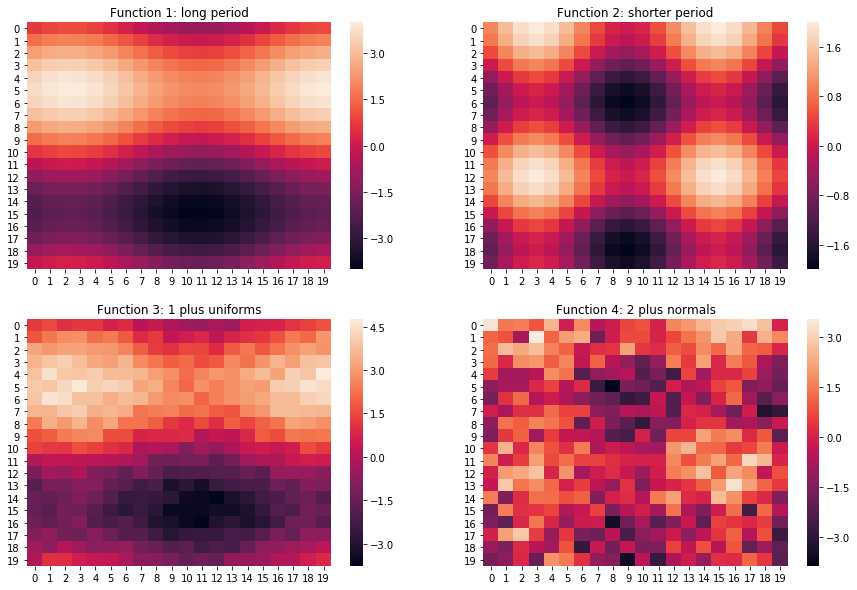

In [3]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
sns.heatmap(Z1, ax=axs[0,0])
axs[0,0].set_title('Function 1: long period')
sns.heatmap(Z2, ax=axs[0,1])
axs[0,1].set_title('Function 2: shorter period')
sns.heatmap(Z3, ax=axs[1,0])
axs[1,0].set_title('Function 3: 1 plus uniforms')
sns.heatmap(Z4, ax=axs[1,1])
axs[1,1].set_title('Function 4: 2 plus normals')

### Creating your own Variogram

For each of the 4 data sets, perform the following calculations, then create a 2x2 plot corresponding to the figure above where you depict the *variograms* of the 4 data sets.

##### a) Calculate all pairwise distances

Suppose we have a function $f$.  To create a variogram of $f$ given a set of observations,

- Take each and every pair of distinct data values $x=(x_1,x_2)$ and $y=(y_1,y_2)$, and computes the distance between those inputs $d((x_1, x_2), (y_1, y_2))$ and the squared distance between their outputs, $(f(x)-f(y))^2$.  If we had $n$ total data points there are $\binom{n}{2}$ such pairs.

Starting with the given code, you can get this by creating tuples out of the `X` and `Y` arrays.

Note that your distance matrix might be as large as $400\times 400$ for the given problem, although you may only need to fill around half of it due to its symmetry.

NB: You may also choose to create a numpy array of distances instead of a matrix if you prefer!

You should also calculate all pairwise squared deviations $(f(x)-f(y))^2$ in the same or a similar structure to your distance object.

In [176]:
import math #for sqrt
#find size of X
shape = X.shape
#create lists for data
tuples = []
distList = []
devListZ1 = []
devListZ2 = []
devListZ3 = []
devListZ4 = []
#loop through so every point is compiled into a list
for i in range(shape[0]):
    for j in range(shape[1]):
        #create tuples of points in form (x,y,z1,z2,z3,z4)
        tuples.append([X[i][j],Y[i][j],Z1[i][j],Z2[i][j],Z3[i][j],Z4[i][j]])
#loop through tuples so every point is compared to every other point
for i in tuples:
    for j in tuples:
        #compute distance between points
        distance = math.sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)
        distList.append(distance)
        #compute squared distance of points outputs for each data set
        deviation1 = (i[2]-j[2])**2
        devListZ1.append(deviation1)
        deviation2 = (i[3]-j[3])**2
        devListZ2.append(deviation2)
        deviation3 = (i[4]-j[4])**2
        devListZ3.append(deviation3)
        deviation4 = (i[5]-j[5])**2
        devListZ4.append(deviation4)
        
#make lists into numpy arrays to help bin
dist = np.array(distList)
devZ1 = np.array(devListZ1)
devZ2 = np.array(devListZ2)
devZ3 = np.array(devListZ3)
devZ4 = np.array(devListZ4)

##### b) bin your data by distance

You should now have two lists/objects/matrices of total entires equal to $\binom{400}{2}$.  One holds distances, the other squared differences of $f$.

- Create "bins" as in a histogram.  Starting at $d=0$ and ending at the maximum observed distance, group each of the $(d(x,y), (f(x)-f(y))^2))$ pair into 20 total bins according to their distance.  So some points will go into the interval from $$[0, \frac{\max_{x,y} d(x,y)}{20}),$$ some into $$[\frac{\max_{x,y} d(x,y)}{20},2 \frac{\max_{x,y} d(x,y)}{20}),$$, and so forth.

In [177]:
#find the maximum distance in the array (amax found in numpy manual)
maxDist = np.amax(dist)
#make tuples of the distance and corresponding squared difference of f values
pairs1 = np.column_stack((dist,devZ1))
pairs2 = np.column_stack((dist,devZ2))
pairs3 = np.column_stack((dist,devZ3))
pairs4 = np.column_stack((dist,devZ4))
#make 20 bins for the data for each of the 4 sets
z1bin1,z1bin2,z1bin3,z1bin4,z1bin5,z1bin6,z1bin7,z1bin8,z1bin9,z1bin10,z1bin11,z1bin12,z1bin13,z1bin14,z1bin15,z1bin16,z1bin17,z1bin18,z1bin19,z1bin20 = ([] for i in range(20))
z2bin1,z2bin2,z2bin3,z2bin4,z2bin5,z2bin6,z2bin7,z2bin8,z2bin9,z2bin10,z2bin11,z2bin12,z2bin13,z2bin14,z2bin15,z2bin16,z2bin17,z2bin18,z2bin19,z2bin20 = ([] for i in range(20))
z3bin1,z3bin2,z3bin3,z3bin4,z3bin5,z3bin6,z3bin7,z3bin8,z3bin9,z3bin10,z3bin11,z3bin12,z3bin13,z3bin14,z3bin15,z3bin16,z3bin17,z3bin18,z3bin19,z3bin20 = ([] for i in range(20))
z4bin1,z4bin2,z4bin3,z4bin4,z4bin5,z4bin6,z4bin7,z4bin8,z4bin9,z4bin10,z4bin11,z4bin12,z4bin13,z4bin14,z4bin15,z4bin16,z4bin17,z4bin18,z4bin19,z4bin20 = ([] for i in range(20))
#bin all the data (sorry this is ugly)
#4 for loops, 1 for each data set, 20 bins of equal size from 0 to maxDistance, add data to appropriate bin
for i in pairs1:
    if i[0]<(maxDist/20):
        z1bin1.append(i)
    elif i[0]>=(maxDist/20) and i[0]<2*(maxDist/20):
        z1bin2.append(i)
    elif i[0]>=2*(maxDist/20) and i[0]<3*(maxDist/20):
        z1bin3.append(i)
    elif i[0]>=3*(maxDist/20) and i[0]<4*(maxDist/20):
        z1bin4.append(i)
    elif i[0]>=4*(maxDist/20) and i[0]<5*(maxDist/20):
        z1bin5.append(i)
    elif i[0]>=5*(maxDist/20) and i[0]<6*(maxDist/20):
        z1bin6.append(i)
    elif i[0]>=6*(maxDist/20) and i[0]<7*(maxDist/20):
        z1bin7.append(i)
    elif i[0]>=7*(maxDist/20) and i[0]<8*(maxDist/20):
        z1bin8.append(i)
    elif i[0]>=8*(maxDist/20) and i[0]<9*(maxDist/20):
        z1bin9.append(i)
    elif i[0]>=9*(maxDist/20) and i[0]<10*(maxDist/20):
        z1bin10.append(i)
    elif i[0]>=10*(maxDist/20) and i[0]<11*(maxDist/20):
        z1bin11.append(i)
    elif i[0]>=11*(maxDist/20) and i[0]<12*(maxDist/20):
        z1bin12.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<13*(maxDist/20):
        z1bin13.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<14*(maxDist/20):
        z1bin14.append(i)
    elif i[0]>=14*(maxDist/20) and i[0]<15*(maxDist/20):
        z1bin15.append(i)
    elif i[0]>=15*(maxDist/20) and i[0]<16*(maxDist/20):
        z1bin16.append(i)
    elif i[0]>=16*(maxDist/20) and i[0]<17*(maxDist/20):
        z1bin17.append(i)
    elif i[0]>=17*(maxDist/20) and i[0]<18*(maxDist/20):
        z1bin18.append(i)
    elif i[0]>=18*(maxDist/20) and i[0]<19*(maxDist/20):
        z1bin19.append(i)
    elif i[0]>=19*(maxDist/20) and i[0]<=20*(maxDist/20):
        z1bin20.append(i)
for i in pairs2:
    if i[0]<(maxDist/20):
        z2bin1.append(i)
    elif i[0]>=(maxDist/20) and i[0]<2*(maxDist/20):
        z2bin2.append(i)
    elif i[0]>=2*(maxDist/20) and i[0]<3*(maxDist/20):
        z2bin3.append(i)
    elif i[0]>=3*(maxDist/20) and i[0]<4*(maxDist/20):
        z2bin4.append(i)
    elif i[0]>=4*(maxDist/20) and i[0]<5*(maxDist/20):
        z2bin5.append(i)
    elif i[0]>=5*(maxDist/20) and i[0]<6*(maxDist/20):
        z2bin6.append(i)
    elif i[0]>=6*(maxDist/20) and i[0]<7*(maxDist/20):
        z2bin7.append(i)
    elif i[0]>=7*(maxDist/20) and i[0]<8*(maxDist/20):
        z2bin8.append(i)
    elif i[0]>=8*(maxDist/20) and i[0]<9*(maxDist/20):
        z2bin9.append(i)
    elif i[0]>=9*(maxDist/20) and i[0]<10*(maxDist/20):
        z2bin10.append(i)
    elif i[0]>=10*(maxDist/20) and i[0]<11*(maxDist/20):
        z2bin11.append(i)
    elif i[0]>=11*(maxDist/20) and i[0]<12*(maxDist/20):
        z2bin12.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<13*(maxDist/20):
        z2bin13.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<14*(maxDist/20):
        z2bin14.append(i)
    elif i[0]>=14*(maxDist/20) and i[0]<15*(maxDist/20):
        z2bin15.append(i)
    elif i[0]>=15*(maxDist/20) and i[0]<16*(maxDist/20):
        z2bin16.append(i)
    elif i[0]>=16*(maxDist/20) and i[0]<17*(maxDist/20):
        z2bin17.append(i)
    elif i[0]>=17*(maxDist/20) and i[0]<18*(maxDist/20):
        z2bin18.append(i)
    elif i[0]>=18*(maxDist/20) and i[0]<19*(maxDist/20):
        z2bin19.append(i)
    elif i[0]>=19*(maxDist/20) and i[0]<=20*(maxDist/20):
        z2bin20.append(i)
for i in pairs3:
    if i[0]<(maxDist/20):
        z3bin1.append(i)
    elif i[0]>=(maxDist/20) and i[0]<2*(maxDist/20):
        z3bin2.append(i)
    elif i[0]>=2*(maxDist/20) and i[0]<3*(maxDist/20):
        z3bin3.append(i)
    elif i[0]>=3*(maxDist/20) and i[0]<4*(maxDist/20):
        z3bin4.append(i)
    elif i[0]>=4*(maxDist/20) and i[0]<5*(maxDist/20):
        z3bin5.append(i)
    elif i[0]>=5*(maxDist/20) and i[0]<6*(maxDist/20):
        z3bin6.append(i)
    elif i[0]>=6*(maxDist/20) and i[0]<7*(maxDist/20):
        z3bin7.append(i)
    elif i[0]>=7*(maxDist/20) and i[0]<8*(maxDist/20):
        z3bin8.append(i)
    elif i[0]>=8*(maxDist/20) and i[0]<9*(maxDist/20):
        z3bin9.append(i)
    elif i[0]>=9*(maxDist/20) and i[0]<10*(maxDist/20):
        z3bin10.append(i)
    elif i[0]>=10*(maxDist/20) and i[0]<11*(maxDist/20):
        z3bin11.append(i)
    elif i[0]>=11*(maxDist/20) and i[0]<12*(maxDist/20):
        z3bin12.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<13*(maxDist/20):
        z3bin13.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<14*(maxDist/20):
        z3bin14.append(i)
    elif i[0]>=14*(maxDist/20) and i[0]<15*(maxDist/20):
        z3bin15.append(i)
    elif i[0]>=15*(maxDist/20) and i[0]<16*(maxDist/20):
        z3bin16.append(i)
    elif i[0]>=16*(maxDist/20) and i[0]<17*(maxDist/20):
        z3bin17.append(i)
    elif i[0]>=17*(maxDist/20) and i[0]<18*(maxDist/20):
        z3bin18.append(i)
    elif i[0]>=18*(maxDist/20) and i[0]<19*(maxDist/20):
        z3bin19.append(i)
    elif i[0]>=19*(maxDist/20) and i[0]<=20*(maxDist/20):
        z3bin20.append(i)
for i in pairs4:
    if i[0]<(maxDist/20):
        z4bin1.append(i)
    elif i[0]>=(maxDist/20) and i[0]<2*(maxDist/20):
        z4bin2.append(i)
    elif i[0]>=2*(maxDist/20) and i[0]<3*(maxDist/20):
        z4bin3.append(i)
    elif i[0]>=3*(maxDist/20) and i[0]<4*(maxDist/20):
        z4bin4.append(i)
    elif i[0]>=4*(maxDist/20) and i[0]<5*(maxDist/20):
        z4bin5.append(i)
    elif i[0]>=5*(maxDist/20) and i[0]<6*(maxDist/20):
        z4bin6.append(i)
    elif i[0]>=6*(maxDist/20) and i[0]<7*(maxDist/20):
        z4bin7.append(i)
    elif i[0]>=7*(maxDist/20) and i[0]<8*(maxDist/20):
        z4bin8.append(i)
    elif i[0]>=8*(maxDist/20) and i[0]<9*(maxDist/20):
        z4bin9.append(i)
    elif i[0]>=9*(maxDist/20) and i[0]<10*(maxDist/20):
        z4bin10.append(i)
    elif i[0]>=10*(maxDist/20) and i[0]<11*(maxDist/20):
        z4bin11.append(i)
    elif i[0]>=11*(maxDist/20) and i[0]<12*(maxDist/20):
        z4bin12.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<13*(maxDist/20):
        z4bin13.append(i)
    elif i[0]>=12*(maxDist/20) and i[0]<14*(maxDist/20):
        z4bin14.append(i)
    elif i[0]>=14*(maxDist/20) and i[0]<15*(maxDist/20):
        z4bin15.append(i)
    elif i[0]>=15*(maxDist/20) and i[0]<16*(maxDist/20):
        z4bin16.append(i)
    elif i[0]>=16*(maxDist/20) and i[0]<17*(maxDist/20):
        z4bin17.append(i)
    elif i[0]>=17*(maxDist/20) and i[0]<18*(maxDist/20):
        z4bin18.append(i)
    elif i[0]>=18*(maxDist/20) and i[0]<19*(maxDist/20):
        z4bin19.append(i)
    elif i[0]>=19*(maxDist/20) and i[0]<=20*(maxDist/20):
        z4bin20.append(i)

##### c) Create local averages

For each of the (hundreds!) of points within each bin, take the mean value of the $(f(x)-f(y))^2))$ deviations in that bin.

You should have a list of 20 average values.


In [178]:
#create variables for list of averages of each data set
avgZ1 = []
avgZ2 = []
avgZ3 = []
avgZ4 = []
#4 sets of 20 for loops, loops go through each bin to calculate average deviations 
#calculate averages of bins for Z1
total = 0
count = 0
for i in z1bin1:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin2:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin3:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin4:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin5:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin6:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin7:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin8:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin9:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin10:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin11:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin12:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin13:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin14:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin15:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin16:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin17:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin18:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin19:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

total = 0
count = 0
for i in z1bin20:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ1.append(avg)

#calculate averages of bins for Z2
total = 0
count = 0
for i in z2bin1:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin2:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin3:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin4:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin5:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin6:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin7:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin8:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin9:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin10:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin11:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin12:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin13:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin14:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin15:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin16:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin17:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin18:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin19:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

total = 0
count = 0
for i in z2bin20:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ2.append(avg)

#calculate averages of bins for Z3
total = 0
count = 0
for i in z3bin1:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin2:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin3:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin4:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin5:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin6:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin7:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin8:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin9:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin10:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin11:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin12:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin13:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin14:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin15:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin16:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin17:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin18:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin19:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

total = 0
count = 0
for i in z3bin20:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ3.append(avg)

#calculate averages of bins for Z4
total = 0
count = 0
for i in z4bin1:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin2:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin3:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin4:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin5:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin6:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin7:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin8:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin9:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin10:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin11:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin12:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin13:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin14:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin15:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin16:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin17:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin18:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin19:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)

total = 0
count = 0
for i in z4bin20:
    total = total + i[1]
    count = count + 1
avg = total/count
avgZ4.append(avg)


##### d) Create variograms

A variogram is a line plot with the center of each bin (the bins in part b) on the $x$-axis and the average squared deviation of points within that bin (found in part c) on the $y$-axis.

In the same 2x2 structure as the given code at the start of the problem, plot the 4 variograms for $F1, F2, F3,$ and $F4).


Text(0.5, 1.0, 'Function 4: 2 plus normals')

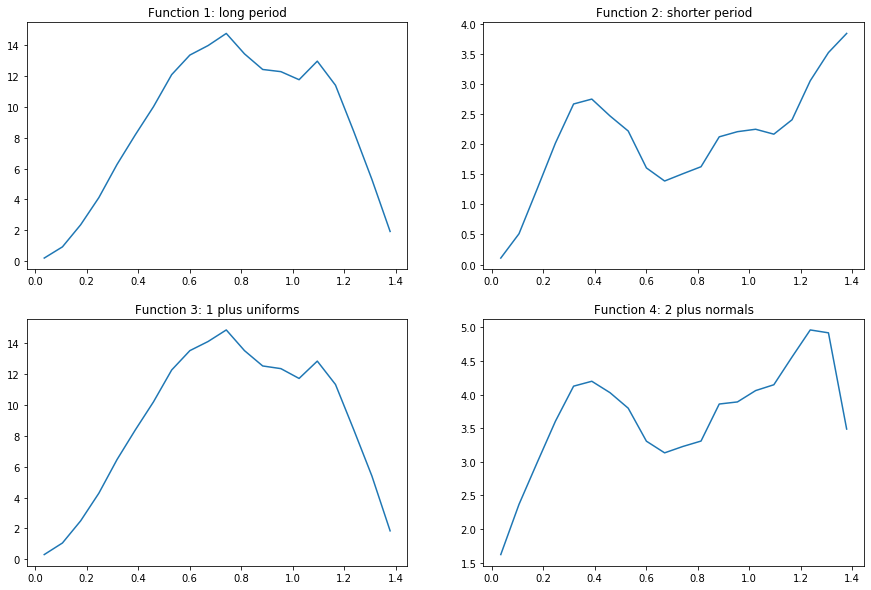

In [182]:
#calculate center of bins
#variable to hold 20 values that are bin centers
xbins = []
last = 0
#loop through each bin and calculate the center
for i in range(1,21):
    center = (last + i*(maxDist/20))/2
    xbins.append(center)
    last = i*(maxDist/20)
#plot
fig, axs = plt.subplots(2, 2,figsize=(15,10))
sns.lineplot(xbins,avgZ1, ax=axs[0,0])
axs[0,0].set_title('Function 1: long period')
sns.lineplot(xbins,avgZ2, ax=axs[0,1])
axs[0,1].set_title('Function 2: shorter period')
sns.lineplot(xbins,avgZ3, ax=axs[1,0])
axs[1,0].set_title('Function 3: 1 plus uniforms')
sns.lineplot(xbins,avgZ4, ax=axs[1,1])
axs[1,1].set_title('Function 4: 2 plus normals')

##### e) Interpret the variograms.  What do different values or features on the variograms appear to correspond to in terms of the shapes of the functions and added randomness of the 4 data sets?


The variograms show how the difference in data sets affects the average deviation between the points that got binned together. Function $2$ has the least amount of variation in its data points compared to the other $3$ functions. Adding uniform noise to function $1$ does not appear to have much affect on the deviation in the points, while adding normal noise to function $2$ gives a clear increase in deviation to the function points.

## Problem 3 (Hypothesis Simulation; 15 points)


One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

### How correlated is really correlated?

The code below simulates from the bivariate normal distribution, which we'll use later this semester.  In brief, it simulates a list of points (called `rnorms` below) as an $j \times 2$ array where each of the `j` rows is an $(x,y)$ point.  We can either simulate these two column vectors $X$ and $Y$ so they're actually independent and the true correlation coefficient $\rho_{xy}=0$ OR we can simulate them with actual correlations included.

We want to know how much correlation is required for us to be able to meaningfully detect it.  Note that our simulated "*sample*" correlation coefficients never actually match the true value!

Example code:

Blue correlation coefficient: [[1.         0.10803352]
 [0.10803352 1.        ]]
Red correlation coefficient: [[1.         0.81494613]
 [0.81494613 1.        ]]


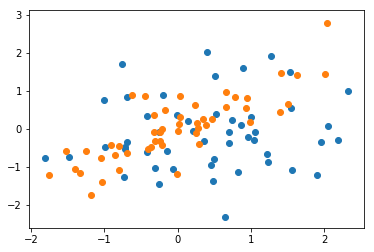

In [4]:
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 indepenent N(0,1)
print('Blue correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?


rho=.8
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 rho=.8 N(0,1)
print('Red correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look correlated?


##### a) Our goal is to understand at what point we can actually tell whether or not things are correlated. To this end, let the example code above guide you to code that allows you to:

 - i) Generate a sample of `j=10` bivariate normals (of mean 0, variance 1) that are uncorrelated.  Calculate the correlation of this sample.
 - ii) Repeat step `i` 1000 times.  Save all 1000 correlation coefficients.
 - iii) Repeat steps `i` and `ii` for `j=100` and `j=1000`.  We now have 3000 correlation coefficients across 3 values of `j`.
 


In [212]:
# step i for j=10
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10)  #sample of size j=10 indepenent N(0,1)
print('j=10 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
coefs10 = []
# step ii for j=10
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs10.append(temp[0][1])
# step i for j=100
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100)  #sample of size j=100 indepenent N(0,1)
print('j=100 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
# step ii for j=100
coefs100 = []
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs100.append(temp[0][1])
# step i for j=1000
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000)  #sample of size j=1000 indepenent N(0,1)
print('j=1000 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
# step ii for j=1000
coefs1000 = []
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs1000.append(temp[0][1])

j=10 correlation coefficient: [[ 1.         -0.56521066]
 [-0.56521066  1.        ]]
j=100 correlation coefficient: [[ 1.         -0.05424921]
 [-0.05424921  1.        ]]
j=1000 correlation coefficient: [[ 1.         -0.02934837]
 [-0.02934837  1.        ]]


Consider testing the null hypothesis:
  - $H_0:$ These samples are uncorrelated
  
  against the alternative
  
  - $H_a:$ These samples have $\rho_{xy} \ne 0$.
  
#### b) At what sample correlations do we reject the null hypothesis if we set a probability of Type I error equal to .05?

This defines the *rejection region* for a statistical test of whether correlation is nonzero!

In [251]:
# sort correlation of j=10
coefs10.sort()
# find the lower and upper rejection region of j=10
lower10 = coefs10[24]
upper10 = coefs10[974]

# sort correlation of j=100
coefs100.sort()
# find the lower and upper rejection region of j=100
lower100 = coefs100[24]
upper100 = coefs100[974]

# sort correlation of j=1000
coefs1000.sort()
# find the lower and upper rejection region of j=1000
lower1000 = coefs1000[24]
upper1000 = coefs1000[974]

print('j=10 rejection region:   ',lower10,' , ',upper10)
print('j=100 rejection region:  ',lower100,' , ',upper100)
print('j=1000 rejection region: ',lower1000,' , ',upper1000)

j=10 rejection region:    -0.5746088633035568  ,  0.6660582846879382
j=100 rejection region:   -0.0993382286488383  ,  0.29169211446550203
j=1000 rejection region:  0.03599487335734743  ,  0.16272894749170902


#### c) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=.1$.

Recall: power is defined as the probability of rejecting the null hypothesis - or being in the rejection region from part b) - when the true correlation was nonzero.  

In [252]:
#### Additional simulations of part a with rho set to 0.1
# step i for j=10
rho=0.1
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10)  #sample of size j=10 indepenent N(0,1)
print('j=10 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
coefs10 = []
# step ii for j=10
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs10.append(temp[0][1])
# step i for j=100
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100)  #sample of size j=100 indepenent N(0,1)
print('j=100 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
# step ii for j=100
coefs100 = []
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs100.append(temp[0][1])
# step i for j=1000
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000)  #sample of size j=1000 indepenent N(0,1)
print('j=1000 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
print('\n')
# step ii for j=1000
coefs1000 = []
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs1000.append(temp[0][1])
    
#### Test from part b    
# sort correlation of j=10
coefs10.sort()
# find the correlation coefficients in the rejection region of j=10
reject = 0
for i in coefs10:
    if i<=lower10 or i>=upper10:
        reject = reject+1
print('There are ', reject, ' results in the established rejection region')
print('j=10 has a ', reject/1000*100, '% chance of being in the rejection region')
print('\n')

# sort correlation of j=100
coefs100.sort()
# find the correlation coefficients in the rejection region of j=100
reject = 0
for i in coefs100:
    if i<=lower100 or i>=upper100:
        reject = reject+1
print('There are ', reject, ' results in the established rejection region')
print('j=100 has a ', reject/1000*100, '% chance of being in the rejection region')
print('\n')

# sort correlation of j=1000
coefs1000.sort()
# find the correlation coefficients in the rejection region of j=1000
reject = 0
for i in coefs1000:
    if i<=lower1000 or i>=upper1000:
        reject = reject+1
print('There are ', reject, ' results in the established rejection region')
print('j=1000 has a ', reject/1000*100, '% chance of being in the rejection region')
print('\n')

j=10 correlation coefficient: [[1.         0.77188267]
 [0.77188267 1.        ]]
j=100 correlation coefficient: [[1.         0.08373669]
 [0.08373669 1.        ]]
j=1000 correlation coefficient: [[1.         0.08220685]
 [0.08220685 1.        ]]


There are  56  results in the established rejection region
j=10 has a  5.6000000000000005 % chance of being in the rejection region


There are  54  results in the established rejection region
j=100 has a  5.4 % chance of being in the rejection region


There are  42  results in the established rejection region
j=1000 has a  4.2 % chance of being in the rejection region




#### d) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=-.1$.  Should this differ from part c)?

In [253]:
#### Additional simulations of part a with rho set to 0.1
# step i for j=10
rho=-0.1
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10)  #sample of size j=10 indepenent N(0,1)
print('j=10 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
coefs10 = []
# step ii for j=10
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],10)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs10.append(temp[0][1])
# step i for j=100
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100)  #sample of size j=100 indepenent N(0,1)
print('j=100 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
# step ii for j=100
coefs100 = []
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],100)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs100.append(temp[0][1])
# step i for j=1000
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000)  #sample of size j=1000 indepenent N(0,1)
print('j=1000 correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
print('\n')
# step ii for j=1000
coefs1000 = []
for i in range(1000):
    rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],1000)
    temp = np.corrcoef(rnorms[:,0],y=rnorms[:,1])
    coefs1000.append(temp[0][1])
    
#### Test from part b    
# sort correlation of j=10
coefs10.sort()
# find the correlation coefficients in the rejection region of j=10
reject = 0
for i in coefs10:
    if i<=lower10 or i>=upper10:
        reject = reject+1
print('There are ', reject, ' results in the established rejection region')
print('j=10 has a ', reject/1000*100, '% chance of being in the rejection region')
print('\n')

# sort correlation of j=100
coefs100.sort()
# find the correlation coefficients in the rejection region of j=100
reject = 0
for i in coefs100:
    if i<=lower100 or i>=upper100:
        reject = reject+1
print('There are ', reject, ' results in the established rejection region')
print('j=100 has a ', reject/1000*100, '% chance of being in the rejection region')
print('\n')

# sort correlation of j=1000
coefs1000.sort()
# find the correlation coefficients in the rejection region of j=1000
reject = 0
for i in coefs1000:
    if i<=lower1000 or i>=upper1000:
        reject = reject+1
print('There are ', reject, ' results in the established rejection region')
print('j=1000 has a ', reject/1000*100, '% chance of being in the rejection region')
print('\n')

j=10 correlation coefficient: [[ 1.        -0.1122277]
 [-0.1122277  1.       ]]
j=100 correlation coefficient: [[ 1.         -0.04112167]
 [-0.04112167  1.        ]]
j=1000 correlation coefficient: [[ 1.        -0.1058205]
 [-0.1058205  1.       ]]


There are  74  results in the established rejection region
j=10 has a  7.3999999999999995 % chance of being in the rejection region


There are  507  results in the established rejection region
j=100 has a  50.7 % chance of being in the rejection region


There are  1000  results in the established rejection region
j=1000 has a  100.0 % chance of being in the rejection region


